In [69]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as plt
import PyPDF2 
import urllib.request
import re

In [20]:
#pip install PyPDF2
#pip install seaborn 
#pip install pylab

In [2]:
SHARKNADO=pd.read_csv('attacks.csv',encoding='iso-8859-1')
SHARKNADO=SHARKNADO.rename(lambda x : x.replace(' ', '_'),axis=1)
SHARKNADO.rename(columns={'Species_':'Species','Sex_':'Sex'},inplace=True)
SHARKNADO.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href_formula', 'href',
       'Case_Number.1', 'Case_Number.2', 'original_order', 'Unnamed:_22',
       'Unnamed:_23'],
      dtype='object')

In [3]:
#Averiguo a partir de que fila hay nulos 

filas_nulas=SHARKNADO.T.isna().sum()
prueba1=filas_nulas[filas_nulas>22]
prueba1=SHARKNADO.T.drop(columns=prueba1.index)
prueba1
#obervo que puedo acortar mas la lista, asi que cambio un poco la condicion
prueba2=SHARKNADO.T.drop(columns=filas_nulas[filas_nulas>21].index)
prueba2
#comparando con la antigua tabla observo que hago un corte, donde mas me beneficiaba para mi analisis 

,0,1,2,3,4,5,6,7,8,9,...,6292,6293,6294,6295,6296,6297,6298,6299,6300,6301
Case_Number,2018.06.25,2018.06.18,2018.06.09,2018.06.08,2018.06.04,2018.06.03.b,2018.06.03.a,2018.05.27,2018.05.26.b,2018.05.26.a,...,ND.0010,ND.0009,ND.0008,ND.0007,ND.0006,ND.0005,ND.0004,ND.0003,ND.0002,ND.0001
Date,25-Jun-2018,18-Jun-2018,09-Jun-2018,08-Jun-2018,04-Jun-2018,03-Jun-2018,03-Jun-2018,27-May-2018,26-May-2018,26-May-2018,...,Circa 1862,Before 1906,Before 1906,Before 1906,Before 1906,Before 1903,Before 1903,1900-1905,1883-1889,1845-1853
Year,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Type,Boating,Unprovoked,Invalid,Unprovoked,Provoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,...,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked
Country,USA,USA,USA,AUSTRALIA,MEXICO,AUSTRALIA,BRAZIL,USA,USA,USA,...,USA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,USA,PANAMA,CEYLON (SRI LANKA)
Area,California,Georgia,Hawaii,New South Wales,Colima,New South Wales,Pernambuco,Florida,Florida,Florida,...,Hawaii,NaN,NaN,NaN,New South Wales,Western Australia,Western Australia,North Carolina,NaN,Eastern Province
Location,"Oceanside, San Diego County","St. Simon Island, Glynn County","Habush, Oahu",Arrawarra Headland,La Ticla,"Flat Rock, Ballina","Piedade Beach, Recife","Lighhouse Point Park, Ponce Inlet, Volusia County","Cocoa Beach, Brevard County","Daytona Beach, Volusia County",...,Puna,NaN,NaN,NaN,,Roebuck Bay,NaN,Ocracoke Inlet,"Panama Bay 8ºN, 79ºW","Below the English fort, Trincomalee"
Activity,Paddling,Standing,Surfing,Surfing,Free diving,Kite surfing,Swimming,Fishing,Walking,Standing,...,NaN,Fishing,Fishing,Fishing,Swimming,Diving,Pearl diving,Swimming,NaN,Swimming
Name,Julie Wolfe,Adyson McNeely,John Denges,male,Gustavo Ramos,Chris,Jose Ernesto da Silva,male,Cody High,male,...,"A ""chiefess""",boy,fisherman,fisherman,Arab boy,male,Ahmun,Coast Guard personnel,Jules Patterson,male
Sex,F,F,M,M,M,M,M,M,M,M,...,F,M,M,M,M,M,M,M,M,M


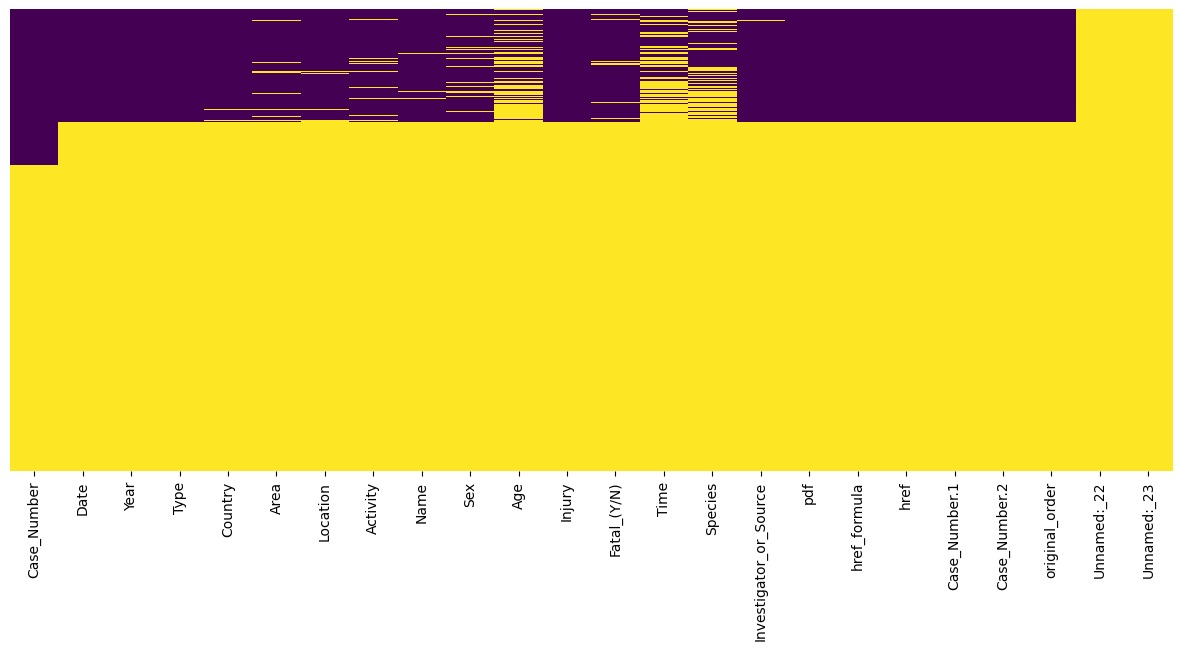

In [4]:
#comprueba que tan importantes son esos datos
plt.figure(figsize=(15, 6))
sb.heatmap(SHARKNADO.isna(),          # datos
            yticklabels=False,        # quita las etiquetas del eje y
            cmap='viridis',           # mapa de color
            cbar=False,)    
plt.show()
#efectivamente hay un tocho de filas que no me sirve, me los cargo:prueba2=filas_nulas[filas_nulas>21], ya que coincide con la tabla anterior



In [5]:
#procedo a la limpieza, y comienza el verdadero reto, como sobrevivir a un tornado de sucesos tiburonicos 
SHARKNADO.drop(filas_nulas[filas_nulas>21].index,axis=0,inplace=True)

In [6]:
SHARKNADO.rename(columns={SHARKNADO.columns[-2]:'Vacio-temp',SHARKNADO.columns[-1]:'vacio-temp2'}, inplace=True)
SHARKNADO[['Vacio-temp','vacio-temp2']]=['fill','fill2']
SHARKNADO
#renombre las columnas mas sencillas de manejar para un uso futuro, las que estaban nulas por completo

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Vacio-temp,vacio-temp2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,fill,fill2
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,fill,fill2
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,fill,fill2
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,fill,fill2
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,fill,fill2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,fill,fill2
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,fill,fill2
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,fill,fill2
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,fill,fill2


In [7]:
SHARKNADO.dtypes
#viendo mi tabla y comparando los tipos de datos puedo hacer unos pequeños cambios en las columnas: 'year'y 'original order'
SHARKNADO[['Year','original_order']].isna().sum()
filasInciertas=SHARKNADO.loc[SHARKNADO['Year'].isna()]
filasInciertas
caso1=SHARKNADO['href'][filasInciertas.index[0]]
caso2=SHARKNADO['href_formula'][filasInciertas.index[1]]
#al tener dos valores nulos hago un pequeño estudio ya que la informacion me permite su facil acceso
caso1,caso2

('http://sharkattackfile.net/spreadsheets/pdf_directory/2017.01.08.R-KerryDaniel.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1835.08.19.R-Whitehaven.pdf')

In [8]:
SHARKNADO.loc[187:188,['Year','Type','Location','Fatal_(Y/N)','Time']]=[2017,'Unprovoked','North Queensland','N','9h']
SHARKNADO[187:188].T

,187
Case_Number,2017.01.08.R
Date,Reported 08-Jan-2017
Year,2017.0
Type,Unprovoked
Country,AUSTRALIA
Area,Queensland
Location,North Queensland
Activity,Spearfishing
Name,Kerry Daniel
Sex,M


In [9]:
SHARKNADO.loc[6079:6080,[ 'Year', 'Name', 'Age','Species']]=[1836,'Unknown','kid','shark']
SHARKNADO[6079:6080].T

,6079
Case_Number,1836.08.19.R
Date,Reported 19-Aug-1836
Year,1836.0
Type,Unprovoked
Country,ENGLAND
Area,Cumberland
Location,Whitehaven
Activity,Swimming
Name,Unknown
Sex,M


In [10]:
#ahora que ya he rellenado los datos puedo proceder a pasarlos a enteros
SHARKNADO[['Year','original_order']].isna().sum()

Year              0
original_order    0
dtype: int64

In [11]:
SHARKNADO[['Year','original_order']]=SHARKNADO[['Year','original_order']].astype(int)
#caigo que tengo años 0, y a no ser que se trate de la epoca de Tiberio Augusto, me parece sospechoso

In [12]:
SHARKNADO.original_order=SHARKNADO.original_order.apply(lambda x : x-1 ) 
SHARKNADO.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_Number             6301 non-null   object
 1   Date                    6302 non-null   object
 2   Year                    6302 non-null   int32 
 3   Type                    6298 non-null   object
 4   Country                 6252 non-null   object
 5   Area                    5847 non-null   object
 6   Location                5763 non-null   object
 7   Activity                5758 non-null   object
 8   Name                    6093 non-null   object
 9   Sex                     5737 non-null   object
 10  Age                     3473 non-null   object
 11  Injury                  6274 non-null   object
 12  Fatal_(Y/N)             5764 non-null   object
 13  Time                    2949 non-null   object
 14  Species                 3465 non-null   object
 15  Inve

In [13]:
SHARKNADO.T

,0,1,2,3,4,5,6,7,8,9,...,6292,6293,6294,6295,6296,6297,6298,6299,6300,6301
Case_Number,2018.06.25,2018.06.18,2018.06.09,2018.06.08,2018.06.04,2018.06.03.b,2018.06.03.a,2018.05.27,2018.05.26.b,2018.05.26.a,...,ND.0010,ND.0009,ND.0008,ND.0007,ND.0006,ND.0005,ND.0004,ND.0003,ND.0002,ND.0001
Date,25-Jun-2018,18-Jun-2018,09-Jun-2018,08-Jun-2018,04-Jun-2018,03-Jun-2018,03-Jun-2018,27-May-2018,26-May-2018,26-May-2018,...,Circa 1862,Before 1906,Before 1906,Before 1906,Before 1906,Before 1903,Before 1903,1900-1905,1883-1889,1845-1853
Year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,0,0,0,0,0,0,0,0,0,0
Type,Boating,Unprovoked,Invalid,Unprovoked,Provoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,...,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked,Unprovoked
Country,USA,USA,USA,AUSTRALIA,MEXICO,AUSTRALIA,BRAZIL,USA,USA,USA,...,USA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,AUSTRALIA,USA,PANAMA,CEYLON (SRI LANKA)
Area,California,Georgia,Hawaii,New South Wales,Colima,New South Wales,Pernambuco,Florida,Florida,Florida,...,Hawaii,NaN,NaN,NaN,New South Wales,Western Australia,Western Australia,North Carolina,NaN,Eastern Province
Location,"Oceanside, San Diego County","St. Simon Island, Glynn County","Habush, Oahu",Arrawarra Headland,La Ticla,"Flat Rock, Ballina","Piedade Beach, Recife","Lighhouse Point Park, Ponce Inlet, Volusia County","Cocoa Beach, Brevard County","Daytona Beach, Volusia County",...,Puna,NaN,NaN,NaN,,Roebuck Bay,NaN,Ocracoke Inlet,"Panama Bay 8ºN, 79ºW","Below the English fort, Trincomalee"
Activity,Paddling,Standing,Surfing,Surfing,Free diving,Kite surfing,Swimming,Fishing,Walking,Standing,...,NaN,Fishing,Fishing,Fishing,Swimming,Diving,Pearl diving,Swimming,NaN,Swimming
Name,Julie Wolfe,Adyson McNeely,John Denges,male,Gustavo Ramos,Chris,Jose Ernesto da Silva,male,Cody High,male,...,"A ""chiefess""",boy,fisherman,fisherman,Arab boy,male,Ahmun,Coast Guard personnel,Jules Patterson,male
Sex,F,F,M,M,M,M,M,M,M,M,...,F,M,M,M,M,M,M,M,M,M


In [30]:
SHARKNADO[SHARKNADO['Species'].isna()].shape

(2837, 24)

In [28]:
for url in SHARKNADO['href'][3000:3300]:
    print(url)

http://sharkattackfile.net/spreadsheets/pdf_directory/1981.12.13.b-NV-ZolaDale.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.12.13.a-Toma.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.11.30-Mercier.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.10.19.b-VanAswegan.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.11.09-Ohai.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.10.19.a-VanHornEly.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.10.17-NV-Conklin.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.10.16-Keifling.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.10.01-Armstrong.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.09.28-Wing.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.09.27-Smodell.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.09.15-Meeker.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/1981.09.

In [72]:
#rompiendome el coco para facilitar la optencion de datos y poder rellenarlos en las columnas comunes de mayor 
pdfurl='http://sharkattackfile.net/spreadsheets/pdf_directory/1981.07.20-NV-Drenko.pdf'
pdfpath, headers = urllib.request.urlretrieve(pdfurl)
with open (pdfpath,'rb') as pdf_file:
    pdfreader=PyPDF2.PdfReader(pdf_file)
    pdftxt=''
    for page in pdfreader.pages:
        pdftxt+=page.extract_text()
patron=r'Specie: (.*?)\b'
tipo=re.search(patron, pdftxt).group(1)
print(pdftxt,tipo)

AttributeError: 'NoneType' object has no attribute 'group'

'  CASE: GSAF 1981.07.20   This report is part way through the verification process. It will be available when it has been verified and digitized.   ACTIVITY: Swimming  DATE:  July 20, 1981  LOCATION: St. Petersburg Beach, Pinellas County, Florida, USA  NAME: Lisa Drenko, a 16-year-old female  INJURY: Foot bitten between arch and big toe, no stitches required  SPECIES: “sandshark”  SOURCE: Electa Pace, Florida Shark Attack File             '

In [68]:
#observo los datos con mayor cantidad de nulos comunes asi como los menores, es decir, si las columnas pueden compartir nulos y que sean lo suficientemente grande como para abarcar ambas casi al 90% de informacion y rellenarlas como localizacion y actividad o edad y hora. Asi por lo menos tengo me deshago de un porcentaje de nulos superior al 65%, por otro lado si cogiera un grupo de 4: area, lolalizacion ,actividad y sex, el porcentaje de nulos disminuira al 25%
SHARKNADO[SHARKNADO['Age'].isna() & SHARKNADO['Time'].isna()].isna().sum()

Case_Number                  1
Date                         0
Year                         0
Type                         2
Country                     35
Area                       302
Location                   365
Activity                   382
Name                       175
Sex                        433
Age                       2237
Injury                      19
Fatal_(Y/N)                263
Time                      2237
Species                   1304
Investigator_or_Source       8
pdf                          0
href_formula                 0
href                         0
Case_Number.1                0
Case_Number.2                0
original_order               0
Vacio-temp                   0
vacio-temp2                  0
dtype: int64

In [53]:
SHARKNADO.original_order

0       6302
1       6301
2       6300
3       6299
4       6298
        ... 
6297       5
6298       4
6299       3
6300       2
6301       1
Name: original_order, Length: 6302, dtype: int64